In [ ]:
%config IPCompleter.greedy=True
import torch
torch.cuda.current_device()

In [ ]:
torch.cuda.get_device_name(0)

## Data cleaning and organization

In [1]:
from fastai.tabular import * 
from fastai.metrics import *
import pandas as pd
import numpy as np

path = './data'

In [2]:
df = pd.read_csv(f'{path}/train.csv')
df.drop('ID_code', axis=1, inplace=True)  
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [21]:
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-40000, len(df))
cont_vars = [l for l in list(df)[1:]]
dep_var = 'target'
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cont_names=cont_vars)

## Training the model

In [22]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [23]:
lr = learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


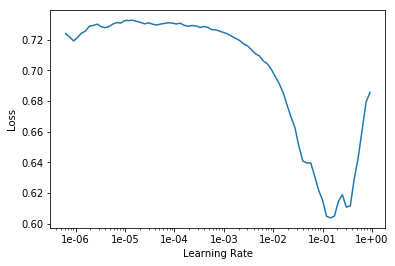

In [24]:
learn.recorder.plot()

In [25]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.250653,0.248219,0.910600


In [26]:
learn.save('santander-3')

In [27]:
learn.load('santander-3')

Learner(data=TabularDataBunch;

Train: LabelList
y: CategoryList (160000 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data
x: TabularList (160000 items)
[TabularLine var_0 -0.5758; var_1 -1.2721; var_2 0.4529; var_3 -0.8327; var_4 0.2352; var_5 -0.5361; var_6 -0.3339; var_7 0.6055; var_8 -1.5606; var_9 -1.4735; var_10 0.4621; var_11 1.0766; var_12 -0.0554; var_13 -1.7158; var_14 0.5621; var_15 -0.0085; var_16 -1.4014; var_17 -0.2288; var_18 -1.3944; var_19 2.2801; var_20 -0.4684; var_21 -0.1284; var_22 -0.6070; var_23 -1.0419; var_24 1.0072; var_25 -0.8243; var_26 -0.1856; var_27 0.4806; var_28 -0.7692; var_29 0.3600; var_30 0.9274; var_31 1.1632; var_32 -1.2999; var_33 0.4883; var_34 -0.4491; var_35 1.2992; var_36 -0.4837; var_37 0.8990; var_38 -1.3939; var_39 0.7885; var_40 0.1816; var_41 -0.3232; var_42 0.5091; var_43 1.5336; var_44 0.4567; var_45 0.2648; var_46 -1.8913; var_47 -0.1656; var_48 0.1174; var_49 -1.4445; var_50 0.2578; var_51 1.9071; var_

In [28]:
learn.unfreeze()
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.236400,0.359961,0.912200
2,0.223013,0.244523,0.912525
3,0.236011,0.339688,0.904625
4,0.223216,0.349743,0.911350
5,0.233274,0.263504,0.911750
6,0.248102,0.255326,0.910500
7,0.242312,0.232924,0.914175
8,0.250623,0.365848,0.912950
9,0.237950,0.277274,0.912400
10,0.243524,0.268316,0.909900


## Testing the model

In [8]:
df2 = pd.read_csv(f'{path}/test.csv')
df2.drop('ID_code', axis=1, inplace=True)  
df2.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [11]:
sub = {
    'ID_code': [],
    'target': []
}
rows = len(df2.index)

for r in range(rows):
    pred = str(learn.predict(df2.iloc[r])[0]).replace('Category ', '')
    test = f'test_{r}'
    sub['ID_code'].append(test)
    sub['target'].append(pred)

In [ ]:
sub['target'][:5]

In [12]:
df3 = pd.DataFrame(data=sub)
df3.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [ ]:
df3.tail()

In [13]:
df3.to_csv('sub3.csv', index=False)